In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

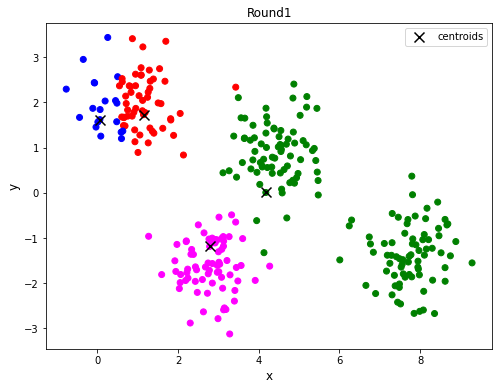

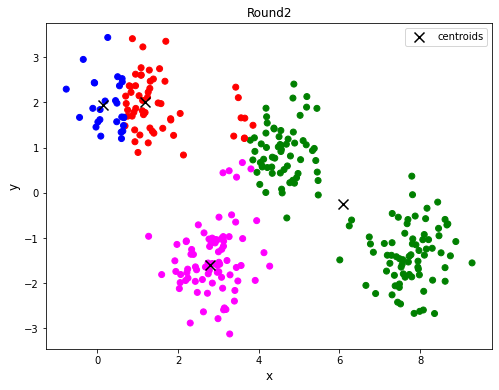

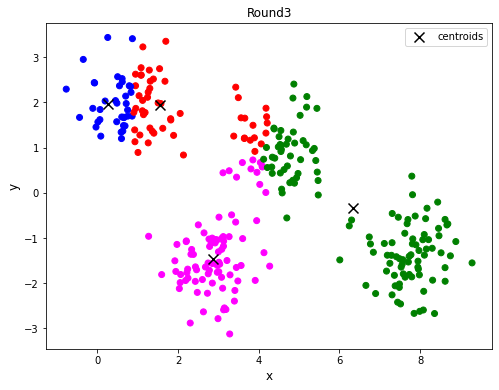

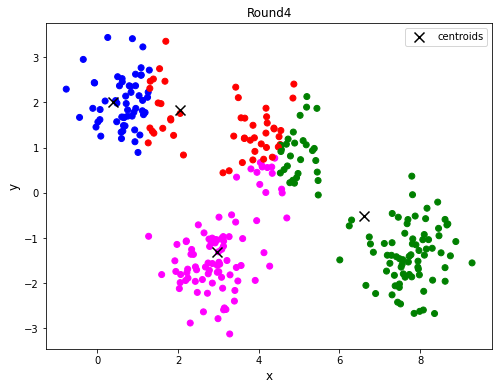

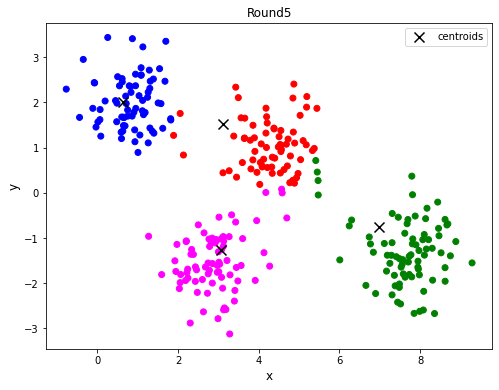

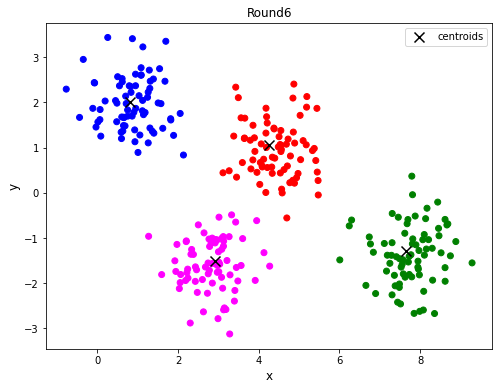

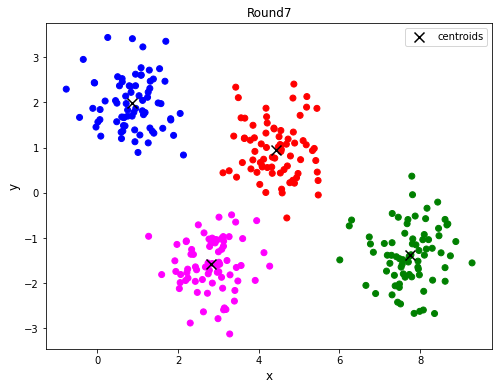

212.00641145466668

In [2]:
# 各點分配到最近的centroid
def assignment(cdata,centroids):
    # 記錄與所有centroids的距離並比較
    for i in range(len(centroids)):
        cdata["%d" %i] = (cdata["x"]-centroids["x"][i])**2 + (cdata["y"]-centroids["y"][i])**2
    
    # 第三個以後的column都是距離
    cdata["cluster"] = cdata.iloc[:, 3:].idxmin(axis="columns")
    cdata["cluster"] = cdata["cluster"].astype("int")
    return cdata

# 以cluster為標準替每個點上色
def coloring(cdata, centroids, idx):
    cdata = assignment(cdata, centroids)
    color_dictionary = {0:'green', 1:'red', 2:'magenta', 3:'blue', 4:'yellow', 5:'pink', 6:'brown', 7:'purple', 8:'cyan', 9:'orange'}
    cdata_color = cdata["cluster"].map(color_dictionary)

    # 建立圖表
    plt.figure(figsize=(8, 6))
    plt.scatter(cdata["x"], cdata["y"], color=cdata_color)
    plt.title("Round%d" %idx)
    plt.xlabel("x",fontsize=12)
    plt.ylabel("y",fontsize=12)

    # 特別標註出centroids
    plt.scatter(centroids["x"], centroids["y"], marker="x", c="black", s=100, label="centroids")
    plt.legend(loc='upper right', bbox_to_anchor=(1,1))
    plt.show()
    
    return cdata

# 找新的centroids
def updating(centroids, cdata):
    for i in range(len(centroids)):
        centroids["x"][i] = cdata[cdata['cluster'] == i]['x'].mean()
        centroids["y"][i] = cdata[cdata['cluster'] == i]['y'].mean()
    return centroids

# 計算SSE
def sse_calculate(cdata):
    total_sse = cdata.iloc[:, 3:].min(axis="columns")
    return total_sse.sum()

# k設定cluster數量, plot表示是否需要畫出散佈圖(0=否, 1=是)
def kmeans_function(k,plot):
    
    cdata = pd.read_csv('./data/cdata.csv')
    # idx紀錄k-means次數
    idx = 1
    # update紀錄是否繼續
    update = True

    while update == True:
        # 第一次執行需要隨機取centroids
        if idx == 1:
            centroids_array = [],[]
            for i in range(k):
                rnd = np.random.randint(len(cdata))
                centroids_array[0].append(cdata["x"][rnd])
                centroids_array[1].append(cdata["y"][rnd])

            centroids = pd.DataFrame(centroids_array, index=["x", "y"]).T

        # 執行k-means
        if plot == 1:
            cdata = coloring(cdata, centroids, idx)
        else:
            cdata = assignment(cdata,centroids)
            
        # 確認centroids是否還有在更新
        old_centroids = centroids.copy()
        centroids = updating(centroids, cdata)
        if old_centroids.equals(centroids) == True:
            update = False
        else:
            idx = idx+1
            
    # 回傳SSE
    return sse_calculate(cdata)

kmeans_function(4,1)            

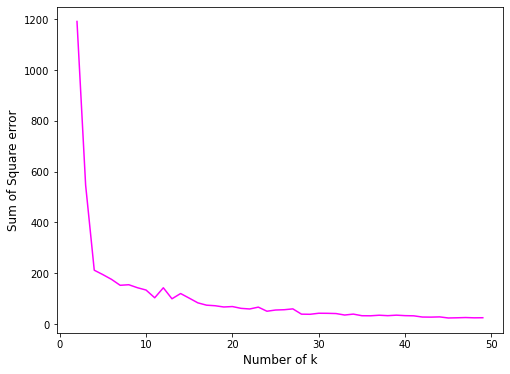

In [4]:
# 計算SSE的部分我放在上一個Code Block
# 計算k=2~50的SSE，會需要跑個30秒~~
total_sse = [],[]
for i in range(2,50):
    total_sse[0].append(i)
    total_sse[1].append(kmeans_function(i,0))
    
sse_df = pd.DataFrame(total_sse, index=["x", "y"]).T

# 匯出折線圖
plt.figure(figsize=(8, 6))
plt.plot(sse_df["x"], sse_df["y"], color = "magenta")
plt.xlabel("Number of k",fontsize=12)
plt.ylabel("Sum of Square error",fontsize=12)
plt.show()

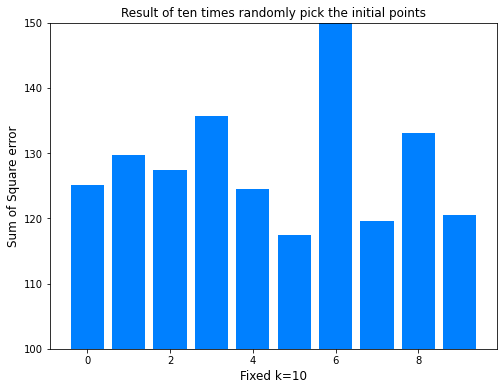

In [5]:
# 用 k=10 跑10次k-means
total_sse = [],[]
for i in range(10):
    total_sse[0].append(i)
    total_sse[1].append(kmeans_function(10,0))

sse_df = pd.DataFrame(total_sse, index=["x", "y"]).T


# 匯出長條圖
plt.figure(figsize=(8, 6))
plt.bar(sse_df["x"], sse_df["y"], color="#0080ff")
plt.title("Result of ten times randomly pick the initial points")
plt.xlabel("Fixed k=10",fontsize=12)
plt.ylabel("Sum of Square error",fontsize=12)
plt.ylim([100,150]) # 設定y軸刻度範圍
plt.show()